# Section 1: Statistical Analysis


Adham Mohmed elsaid elwakel
222 100 195


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import os
import sys
import warnings
warnings.filterwarnings('ignore')

# Add parent directory to path for utils import
sys.path.append(os.path.dirname(os.path.abspath(os.getcwd())))

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Dataset Loading and Validation

Load the Electronics dataset and verify it meets the requirements:
- ≥ 100,000 users
- ≥ 1,000 products
- ≥ 1 million ratings


In [2]:
# Define paths (relative to notebook location)
DATASET_PATH = '../dataset'
RESULTS_PATH = '../results'

# Create results directory if it doesn't exist
os.makedirs(RESULTS_PATH, exist_ok=True)

# Load Electronics dataset (no header, columns: product_id, user_id, rating, timestamp)
print("Loading Electronics dataset...")
print("This may take a moment due to the large file size (~21 million ratings)...")

ratings = pd.read_csv(
    os.path.join(DATASET_PATH, 'Electronics.csv'),
    header=None,
    names=['item_id', 'user_id', 'rating', 'timestamp']
)

print(f"\nRatings shape: {ratings.shape}")
print(f"Memory usage: {ratings.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


Loading Electronics dataset...
This may take a moment due to the large file size (~21 million ratings)...

Ratings shape: (20994353, 4)
Memory usage: 2757.76 MB


In [3]:
# Display sample data
print("--- Ratings Sample ---")
display(ratings.head(10))

print("\n--- Ratings Info ---")
print(ratings.info())


--- Ratings Sample ---


,item_id,user_id,rating,timestamp
0,0060009810,A1N070NS9CJQ2I,5.00,1026864000
1,0060009810,A3P0KRKOBQK1KN,5.00,1025913600
2,0060009810,A192HO2ICJ75VU,5.00,1025654400
3,0060009810,A2T278FKFL3BLT,4.00,1025395200
4,0060009810,A2ZUXVTW8RXBXW,5.00,1025222400
5,0060009810,A21JDG4HA6OLPF,4.00,1024963200
6,0060009810,A2NCADLQY962YD,5.00,1024704000
7,0060786817,A2UNA438B0FRA8,5.00,1138233600
8,0060786817,A2NQQSHSQKKGEX,5.00,1137801600
9,0060786817,A5EXND10WD4PM,3.00,1137542400



--- Ratings Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20994353 entries, 0 to 20994352
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   item_id    object 
 1   user_id    object 
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 640.7+ MB
None


In [4]:
# Dataset validation
n_users = ratings['user_id'].nunique()
n_items = ratings['item_id'].nunique()
n_ratings = len(ratings)

print("=" * 50)
print("DATASET VALIDATION")
print("=" * 50)
print(f"Number of unique users: {n_users:,}")
print(f"Number of unique items (products): {n_items:,}")
print(f"Total number of ratings: {n_ratings:,}")
print("=" * 50)

# Validation checks
print("\nRequirement Checks:")
print(f"  Users ≥ 100,000: {'✓' if n_users >= 100000 else '✗'} ({n_users:,})")
print(f"  Items ≥ 1,000: {'✓' if n_items >= 1000 else '✗'} ({n_items:,})")
print(f"  Ratings ≥ 1,000,000: {'✓' if n_ratings >= 1000000 else '✗'} ({n_ratings:,})")


DATASET VALIDATION
Number of unique users: 9,838,676
Number of unique items (products): 756,489
Total number of ratings: 20,994,353

Requirement Checks:
  Users ≥ 100,000: ✓ (9,838,676)
  Items ≥ 1,000: ✓ (756,489)
  Ratings ≥ 1,000,000: ✓ (20,994,353)


## 2. Preprocess Dataset - Adjust Ratings to 1-5 Scale

Verify ratings are on the 1-5 scale. If not, normalize them.


In [5]:
# Check rating distribution
print("Rating Distribution Before Preprocessing:")
print(ratings['rating'].value_counts().sort_index())

print(f"\nMin rating: {ratings['rating'].min()}")
print(f"Max rating: {ratings['rating'].max()}")


Rating Distribution Before Preprocessing:
rating
1.00     2415650
2.00     1139589
3.00     1529818
4.00     3306379
5.00    12602917
Name: count, dtype: int64

Min rating: 1.0
Max rating: 5.0


In [6]:
# Verify ratings are already on 1-5 scale
min_rating = ratings['rating'].min()
max_rating = ratings['rating'].max()

if min_rating >= 1 and max_rating <= 5:
    print("✓ Ratings are already on 1-5 scale. No preprocessing needed.")
else:
    # Normalize to 1-5 scale if needed
    print("Normalizing ratings to 1-5 scale...")
    ratings['rating'] = 1 + (ratings['rating'] - min_rating) * 4 / (max_rating - min_rating)
    ratings['rating'] = ratings['rating'].round(2)
    print("✓ Ratings normalized.")

print(f"\nRating range: {ratings['rating'].min()} - {ratings['rating'].max()}")


✓ Ratings are already on 1-5 scale. No preprocessing needed.

Rating range: 1.0 - 5.0


## 3. Calculate Number of Ratings per User (n_u)

Calculate and save the number of ratings for each user.


In [7]:
# Calculate number of ratings per user (n_u)
n_u = ratings.groupby('user_id').size().reset_index(name='nu')

print("Number of Ratings per User (n_u):")
print(f"  Total users: {len(n_u):,}")
print(f"  Min ratings per user: {n_u['nu'].min()}")
print(f"  Max ratings per user: {n_u['nu'].max()}")
print(f"  Mean ratings per user: {round(n_u['nu'].mean(), 2)}")
print(f"  Median ratings per user: {n_u['nu'].median()}")

# Display sample
print("\nSample:")
display(n_u.head(10))

# Save n_u to results
n_u.to_csv(os.path.join(RESULTS_PATH, 'nu_ratings_per_user.csv'), index=False)
print("✓ Saved: nu_ratings_per_user.csv")


Number of Ratings per User (n_u):
  Total users: 9,838,676
  Min ratings per user: 1
  Max ratings per user: 633
  Mean ratings per user: 2.13
  Median ratings per user: 1.0

Sample:


,user_id,nu
0,A0000040I1OM9N4SGBD8,1
1,A00010809P09NUU6ZP6H,1
2,A0001392JPQ8N7MSF2CV,1
3,A0001410YRCTKL1MHXQJ,1
4,A0001528BGUBOEVR6T5U,7
5,A0001810QB3WX1VF3K6H,1
6,A0002012T7HVDB2EF4RH,1
7,A0002032ZFQKDVHYKGWR,1
8,A0002686ZNGLCW7JVER2,1
9,A0002730WOKVUCGRLYJU,2


✓ Saved: nu_ratings_per_user.csv


## 4. Calculate Number of Ratings per Item (n_i)

Calculate and save the number of ratings for each item (product).


In [8]:
# Calculate number of ratings per item (n_i)
n_i = ratings.groupby('item_id').size().reset_index(name='ni')

print("Number of Ratings per Item (n_i):")
print(f"  Total items: {len(n_i):,}")
print(f"  Min ratings per item: {n_i['ni'].min()}")
print(f"  Max ratings per item: {n_i['ni'].max()}")
print(f"  Mean ratings per item: {round(n_i['ni'].mean(), 2)}")
print(f"  Median ratings per item: {n_i['ni'].median()}")

# Display sample
print("\nSample:")
display(n_i.head(10))

# Save n_i to results
n_i.to_csv(os.path.join(RESULTS_PATH, 'ni_ratings_per_item.csv'), index=False)
print("✓ Saved: ni_ratings_per_item.csv")


Number of Ratings per Item (n_i):
  Total items: 756,489
  Min ratings per item: 1
  Max ratings per item: 28539
  Mean ratings per item: 27.75
  Median ratings per item: 3.0

Sample:


,item_id,ni
0,0011300000,2
1,0043396828,1
2,0060009810,17
3,0060219602,2
4,0060786817,55
5,0070524076,22
6,0091912407,7
7,0101635370,78
8,0132492776,8
9,0132793040,2


✓ Saved: ni_ratings_per_item.csv


## 5. Compute Average Ratings per User (r_u)

Calculate and save the average rating given by each user.


In [9]:
# Calculate average ratings per user (r_u)
r_u = ratings.groupby('user_id')['rating'].mean().reset_index(name='ru')
r_u['ru'] = r_u['ru'].round(2)

print("Average Ratings per User (r_u):")
print(f"  Min avg rating: {r_u['ru'].min()}")
print(f"  Max avg rating: {r_u['ru'].max()}")
print(f"  Mean of avg ratings: {round(r_u['ru'].mean(), 2)}")
print(f"  Std of avg ratings: {round(r_u['ru'].std(), 2)}")

# Display sample
print("\nSample:")
display(r_u.head(10))

# Save r_u to results
r_u.to_csv(os.path.join(RESULTS_PATH, 'ru_avg_ratings_per_user.csv'), index=False)
print("✓ Saved: ru_avg_ratings_per_user.csv")


Average Ratings per User (r_u):
  Min avg rating: 1.0
  Max avg rating: 5.0
  Mean of avg ratings: 3.95
  Std of avg ratings: 1.38

Sample:


,user_id,ru
0,A0000040I1OM9N4SGBD8,2.00
1,A00010809P09NUU6ZP6H,5.00
2,A0001392JPQ8N7MSF2CV,5.00
3,A0001410YRCTKL1MHXQJ,4.00
4,A0001528BGUBOEVR6T5U,4.43
5,A0001810QB3WX1VF3K6H,3.00
6,A0002012T7HVDB2EF4RH,4.00
7,A0002032ZFQKDVHYKGWR,5.00
8,A0002686ZNGLCW7JVER2,5.00
9,A0002730WOKVUCGRLYJU,4.00


✓ Saved: ru_avg_ratings_per_user.csv


## 6. Compute Average Ratings per Item (r_i)

Calculate and save the average rating received by each item (product).


In [10]:
# Calculate average ratings per item (r_i)
r_i = ratings.groupby('item_id')['rating'].mean().reset_index(name='ri')
r_i['ri'] = r_i['ri'].round(2)

print("Average Ratings per Item (r_i):")
print(f"  Min avg rating: {r_i['ri'].min()}")
print(f"  Max avg rating: {r_i['ri'].max()}")
print(f"  Mean of avg ratings: {round(r_i['ri'].mean(), 2)}")
print(f"  Std of avg ratings: {round(r_i['ri'].std(), 2)}")

# Display sample
print("\nSample:")
display(r_i.head(10))

# Save r_i to results
r_i.to_csv(os.path.join(RESULTS_PATH, 'ri_avg_ratings_per_item.csv'), index=False)
print("✓ Saved: ri_avg_ratings_per_item.csv")


Average Ratings per Item (r_i):
  Min avg rating: 1.0
  Max avg rating: 5.0
  Mean of avg ratings: 3.93
  Std of avg ratings: 1.1

Sample:


,item_id,ri
0,0011300000,2.50
1,0043396828,3.00
2,0060009810,4.53
3,0060219602,5.00
4,0060786817,3.62
5,0070524076,4.00
6,0091912407,3.86
7,0101635370,2.91
8,0132492776,5.00
9,0132793040,5.00


✓ Saved: ri_avg_ratings_per_item.csv


## 7. Order and Plot Distribution of Ratings per Item (Ascending)

Sort items by their total number of ratings and visualize the distribution.


In [11]:
# Sort items by number of ratings (ascending)
n_i_sorted = n_i.sort_values('ni', ascending=True).reset_index(drop=True)
n_i_sorted['rank'] = range(1, len(n_i_sorted) + 1)

print("Items sorted by number of ratings (ascending):")
print("\nLeast rated items:")
display(n_i_sorted.head(10))

print("\nMost rated items:")
display(n_i_sorted.tail(10))


Items sorted by number of ratings (ascending):

Least rated items:


,item_id,ni,rank
0,B01HJH6CEY,1,1
1,B00K1MQ9YI,1,2
2,B00K1MO11G,1,3
3,B00K1MN3RY,1,4
4,B004VD45T4,1,5
5,B00K1ML1RS,1,6
6,B00K1MECMY,1,7
7,B00K1MCCOY,1,8
8,B00K1MAS68,1,9
9,B004VD5VQK,1,10



Most rated items:


,item_id,ni,rank
756479,B00IVPU7AO,14246,756480
756480,B00ITIQI92,14413,756481
756481,B00BWF5U0M,14674,756482
756482,B0019HL8Q8,15399,756483
756483,B00P7EVST6,15452,756484
756484,B003L1ZYYW,16056,756485
756485,B006GWO5WK,16130,756486
756486,B00DIF2BO2,17045,756487
756487,B00L0YLRUW,20873,756488
756488,B010OYASRG,28539,756489


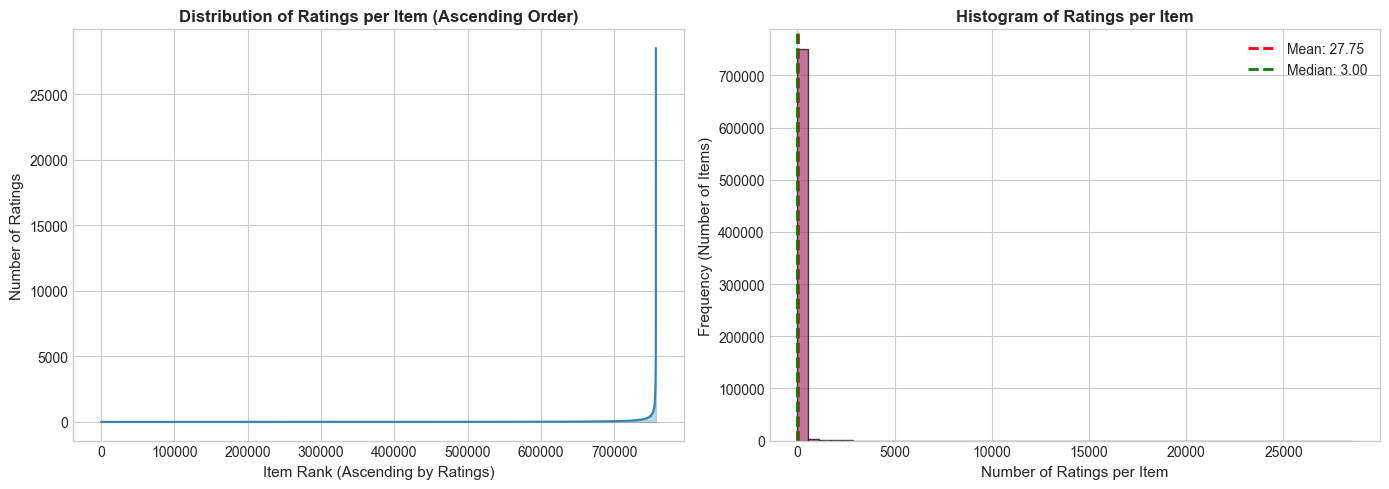

✓ Saved: distribution_ratings_per_item.png


In [12]:
# Plot distribution of ratings per item
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Sorted distribution (ascending)
axes[0].plot(n_i_sorted['rank'], n_i_sorted['ni'], linewidth=1.5, color='#2E86AB')
axes[0].set_xlabel('Item Rank (Ascending by Ratings)', fontsize=11)
axes[0].set_ylabel('Number of Ratings', fontsize=11)
axes[0].set_title('Distribution of Ratings per Item (Ascending Order)', fontsize=12, fontweight='bold')
axes[0].fill_between(n_i_sorted['rank'], n_i_sorted['ni'], alpha=0.3, color='#2E86AB')

# Plot 2: Histogram of ratings per item
axes[1].hist(n_i['ni'], bins=50, edgecolor='black', alpha=0.7, color='#A23B72')
axes[1].set_xlabel('Number of Ratings per Item', fontsize=11)
axes[1].set_ylabel('Frequency (Number of Items)', fontsize=11)
axes[1].set_title('Histogram of Ratings per Item', fontsize=12, fontweight='bold')
axes[1].axvline(n_i['ni'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {n_i["ni"].mean():.2f}')
axes[1].axvline(n_i['ni'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {n_i["ni"].median():.2f}')
axes[1].legend()

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_PATH, 'distribution_ratings_per_item.png'), dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: distribution_ratings_per_item.png")


## 8. Group Products by Average Ratings (G1-G10)

Classify products into 10 groups based on their average ratings as percentiles:
- G1: ≤ 1%
- G2: 1% < x ≤ 5%
- G3: 5% < x ≤ 10%
- G4: 10% < x ≤ 20%
- G5: 20% < x ≤ 30%
- G6: 30% < x ≤ 40%
- G7: 40% < x ≤ 50%
- G8: 50% < x ≤ 60%
- G9: 60% < x ≤ 70%
- G10: 70% < x ≤ 100%


In [13]:
# Merge n_i with r_i to get both number and average of ratings per item
item_stats = n_i.merge(r_i, on='item_id')

# Calculate percentile rank for each item based on average rating
max_avg_rating = 5.0

def assign_group(avg_rating, max_rating=5.0):
    """
    Assign item to group based on average rating percentage.
    Groups are based on what percentage of max rating the item has.
    """
    percentage = (avg_rating / max_rating) * 100
    
    if percentage <= 1:
        return 'G1'
    elif percentage <= 5:
        return 'G2'
    elif percentage <= 10:
        return 'G3'
    elif percentage <= 20:
        return 'G4'
    elif percentage <= 30:
        return 'G5'
    elif percentage <= 40:
        return 'G6'
    elif percentage <= 50:
        return 'G7'
    elif percentage <= 60:
        return 'G8'
    elif percentage <= 70:
        return 'G9'
    else:
        return 'G10'

# Assign groups
item_stats['group'] = item_stats['ri'].apply(assign_group)

print("Items assigned to groups:")
display(item_stats.head(10))

# Count number of products in each group
group_counts = item_stats['group'].value_counts().sort_index()

print("\nNumber of Products in Each Group:")
print("=" * 40)
for group in ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10']:
    count = group_counts.get(group, 0)
    print(f"  {group}: {count:,} products")
print("=" * 40)
print(f"  Total: {group_counts.sum():,} products")


Items assigned to groups:


,item_id,ni,ri,group
0,0011300000,2,2.50,G7
1,0043396828,1,3.00,G8
2,0060009810,17,4.53,G10
3,0060219602,2,5.00,G10
4,0060786817,55,3.62,G10
5,0070524076,22,4.00,G10
6,0091912407,7,3.86,G10
7,0101635370,78,2.91,G8
8,0132492776,8,5.00,G10
9,0132793040,2,5.00,G10



Number of Products in Each Group:
  G1: 0 products
  G2: 0 products
  G3: 0 products
  G4: 41,297 products
  G5: 4,102 products
  G6: 25,327 products
  G7: 18,732 products
  G8: 69,356 products
  G9: 55,789 products
  G10: 541,886 products
  Total: 756,489 products


In [14]:
# Calculate total ratings in each group
group_ratings = item_stats.groupby('group')['ni'].sum().reset_index(name='total_ratings')

# Ensure all groups are present
all_groups = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10']
group_ratings_full = pd.DataFrame({'group': all_groups})
group_ratings_full = group_ratings_full.merge(group_ratings, on='group', how='left').fillna(0)
group_ratings_full['total_ratings'] = group_ratings_full['total_ratings'].astype(int)

print("Total Ratings in Each Group (Original Order):")
display(group_ratings_full)

# Sort by total ratings (ascending)
group_ratings_sorted = group_ratings_full.sort_values('total_ratings', ascending=True).reset_index(drop=True)

print("\nTotal Ratings in Each Group (Ascending Order):")
display(group_ratings_sorted)

# Save group statistics
group_stats = group_ratings_full.copy()
group_stats['num_products'] = group_stats['group'].map(group_counts).fillna(0).astype(int)
group_stats.to_csv(os.path.join(RESULTS_PATH, 'group_statistics.csv'), index=False)
print("✓ Saved: group_statistics.csv")


Total Ratings in Each Group (Original Order):


,group,total_ratings
0,G1,0
1,G2,0
2,G3,0
3,G4,49074
4,G5,14707
5,G6,80557
6,G7,188232
7,G8,684070
8,G9,1805596
9,G10,18172117



Total Ratings in Each Group (Ascending Order):


,group,total_ratings
0,G1,0
1,G2,0
2,G3,0
3,G5,14707
4,G4,49074
5,G6,80557
6,G7,188232
7,G8,684070
8,G9,1805596
9,G10,18172117


✓ Saved: group_statistics.csv


## 10. Plot Distribution of Ratings by Group (Before and After Ordering)


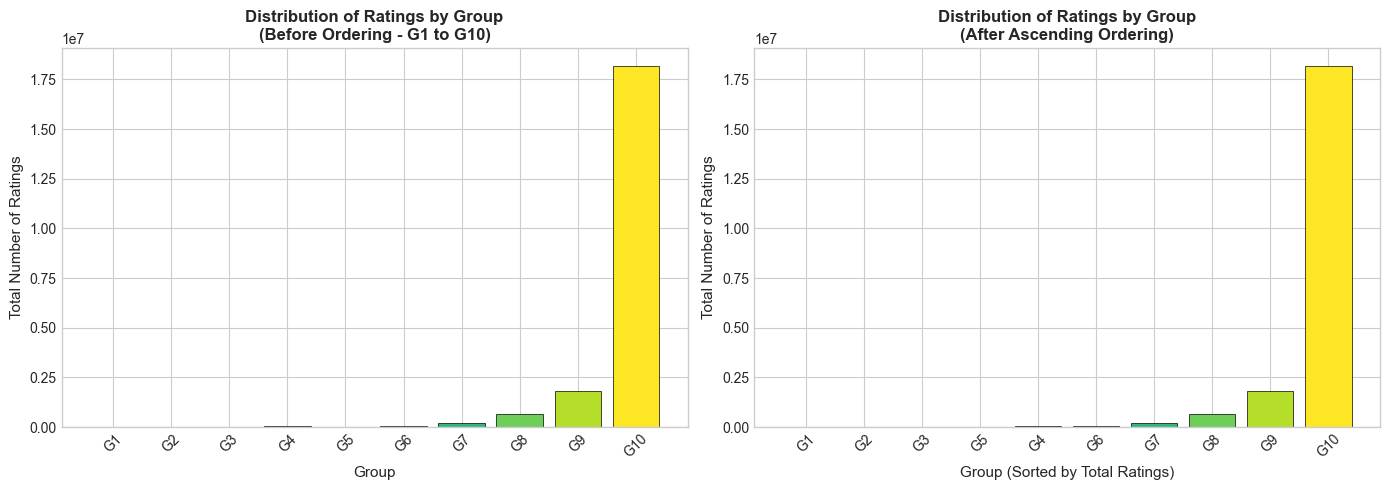

✓ Saved: group_ratings_distribution.png


In [15]:
# Create comparison plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Color palette
colors = plt.cm.viridis(np.linspace(0, 1, 10))

# Plot 1: Before ordering (G1-G10 in order)
bars1 = axes[0].bar(group_ratings_full['group'], group_ratings_full['total_ratings'], 
                    color=colors, edgecolor='black', linewidth=0.5)
axes[0].set_xlabel('Group', fontsize=11)
axes[0].set_ylabel('Total Number of Ratings', fontsize=11)
axes[0].set_title('Distribution of Ratings by Group\n(Before Ordering - G1 to G10)', fontsize=12, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: After ordering (ascending by total ratings)
bars2 = axes[1].bar(range(len(group_ratings_sorted)), group_ratings_sorted['total_ratings'], 
                    color=[colors[all_groups.index(g)] for g in group_ratings_sorted['group']], 
                    edgecolor='black', linewidth=0.5)
axes[1].set_xticks(range(len(group_ratings_sorted)))
axes[1].set_xticklabels(group_ratings_sorted['group'])
axes[1].set_xlabel('Group (Sorted by Total Ratings)', fontsize=11)
axes[1].set_ylabel('Total Number of Ratings', fontsize=11)
axes[1].set_title('Distribution of Ratings by Group\n(After Ascending Ordering)', fontsize=12, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_PATH, 'group_ratings_distribution.png'), dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: group_ratings_distribution.png")


## 11. Select Three Target Users

Select target users based on their rating percentile:
- U1: ≤ 2% ratings
- U2: > 2% and ≤ 5% ratings
- U3: ≥ 5% and ≤ 10% ratings


In [16]:
# Calculate rating percentiles for users
max_user_ratings = n_u['nu'].max()
min_user_ratings = n_u['nu'].min()

# Calculate percentile rank (0-100)
n_u['rating_percentile'] = n_u['nu'].rank(pct=True) * 100
n_u['rating_percentile'] = n_u['rating_percentile'].round(2)

print(f"User ratings range: {min_user_ratings} - {max_user_ratings}")
print(f"\nUser rating percentile distribution:")
print(n_u['rating_percentile'].describe())
print(f"\nUsers in bottom 2%: {len(n_u[n_u['rating_percentile'] <= 2])}")
print(f"Users in 2-5%: {len(n_u[(n_u['rating_percentile'] > 2) & (n_u['rating_percentile'] <= 5)])}")
print(f"Users in 5-10%: {len(n_u[(n_u['rating_percentile'] > 5) & (n_u['rating_percentile'] <= 10)])}")


User ratings range: 1 - 633

User rating percentile distribution:
count   9838676.00
mean         50.00
std          24.87
min          31.59
25%          31.59
50%          31.59
75%          71.87
max         100.00
Name: rating_percentile, dtype: float64

Users in bottom 2%: 0
Users in 2-5%: 0
Users in 5-10%: 0


In [17]:
# Select target users
# U1: ≤ 2% ratings (bottom 2% of users)
u1_candidates = n_u[n_u['rating_percentile'] <= 2]
if len(u1_candidates) == 0:
    u1_candidates = n_u.nsmallest(int(len(n_u) * 0.02), 'nu')
U1 = u1_candidates.sample(1, random_state=42).iloc[0]

# U2: > 2% and ≤ 5% ratings
u2_candidates = n_u[(n_u['rating_percentile'] > 2) & (n_u['rating_percentile'] <= 5)]
if len(u2_candidates) == 0:
    lower = n_u['nu'].quantile(0.02)
    upper = n_u['nu'].quantile(0.05)
    u2_candidates = n_u[(n_u['nu'] > lower) & (n_u['nu'] <= upper)]
U2 = u2_candidates.sample(1, random_state=42).iloc[0] if len(u2_candidates) > 0 else None

# U3: > 5% and ≤ 10% ratings
u3_candidates = n_u[(n_u['rating_percentile'] > 5) & (n_u['rating_percentile'] <= 10)]
if len(u3_candidates) == 0:
    lower = n_u['nu'].quantile(0.05)
    upper = n_u['nu'].quantile(0.10)
    u3_candidates = n_u[(n_u['nu'] > lower) & (n_u['nu'] <= upper)]
U3 = u3_candidates.sample(1, random_state=42).iloc[0] if len(u3_candidates) > 0 else None

print("=" * 60)
print("SELECTED TARGET USERS")
print("=" * 60)
print(f"\nU1 (≤ 2% - bottom percentile, fewest ratings):")
print(f"  User ID: {U1['user_id']}")
print(f"  Number of ratings: {int(U1['nu'])}")
print(f"  Percentile rank: {U1['rating_percentile']}%")

if U2 is not None:
    print(f"\nU2 (> 2% and ≤ 5% percentile):")
    print(f"  User ID: {U2['user_id']}")
    print(f"  Number of ratings: {int(U2['nu'])}")
    print(f"  Percentile rank: {U2['rating_percentile']}%")

if U3 is not None:
    print(f"\nU3 (> 5% and ≤ 10% percentile):")
    print(f"  User ID: {U3['user_id']}")
    print(f"  Number of ratings: {int(U3['nu'])}")
    print(f"  Percentile rank: {U3['rating_percentile']}%")
print("=" * 60)

# Save target users
target_users = pd.DataFrame({
    'target': ['U1', 'U2', 'U3'],
    'user_id': [U1['user_id'], U2['user_id'] if U2 is not None else None, 
                U3['user_id'] if U3 is not None else None],
    'num_ratings': [int(U1['nu']), int(U2['nu']) if U2 is not None else None,
                    int(U3['nu']) if U3 is not None else None],
    'rating_percentile': [U1['rating_percentile'], U2['rating_percentile'] if U2 is not None else None,
                          U3['rating_percentile'] if U3 is not None else None]
})
target_users.to_csv(os.path.join(RESULTS_PATH, 'target_users.csv'), index=False)
print("✓ Saved: target_users.csv")
display(target_users)


SELECTED TARGET USERS

U1 (≤ 2% - bottom percentile, fewest ratings):
  User ID: A10L4MSBPUTYDE
  Number of ratings: 1
  Percentile rank: 31.59%
✓ Saved: target_users.csv


,target,user_id,num_ratings,rating_percentile
0,U1,A10L4MSBPUTYDE,1.00,31.59
1,U2,None,NaN,NaN
2,U3,None,NaN,NaN


## 12. Select Two Target Items (Lowest Rated)

Select the two lowest rated items (I1 and I2) as target items.


In [18]:
# Select two lowest rated items (by average rating)
lowest_rated = r_i.nsmallest(2, 'ri')

I1 = lowest_rated.iloc[0]
I2 = lowest_rated.iloc[1]

# Get additional info
I1_info = item_stats[item_stats['item_id'] == I1['item_id']].iloc[0]
I2_info = item_stats[item_stats['item_id'] == I2['item_id']].iloc[0]

print("=" * 60)
print("SELECTED TARGET ITEMS (LOWEST RATED)")
print("=" * 60)
print(f"\nI1 (Lowest rated item):")
print(f"  Item ID: {I1['item_id']}")
print(f"  Average rating: {I1['ri']}")
print(f"  Number of ratings: {int(I1_info['ni'])}")

print(f"\nI2 (Second lowest rated item):")
print(f"  Item ID: {I2['item_id']}")
print(f"  Average rating: {I2['ri']}")
print(f"  Number of ratings: {int(I2_info['ni'])}")
print("=" * 60)

# Save target items
target_items = pd.DataFrame({
    'target': ['I1', 'I2'],
    'item_id': [I1['item_id'], I2['item_id']],
    'avg_rating': [I1['ri'], I2['ri']],
    'num_ratings': [int(I1_info['ni']), int(I2_info['ni'])]
})
target_items.to_csv(os.path.join(RESULTS_PATH, 'target_items.csv'), index=False)
print("✓ Saved: target_items.csv")
display(target_items)


SELECTED TARGET ITEMS (LOWEST RATED)

I1 (Lowest rated item):
  Item ID: 0323230008
  Average rating: 1.0
  Number of ratings: 1

I2 (Second lowest rated item):
  Item ID: 0594015421
  Average rating: 1.0
  Number of ratings: 1
✓ Saved: target_items.csv


,target,item_id,avg_rating,num_ratings
0,I1,0323230008,1.00,1
1,I2,0594015421,1.00,1


## 13. Co-rating Analysis

Count:
- Number of co-rating users between each target user and other users (No_common_users)
- Number of co-rated items between each target item and other items (No_coRated_items)


In [19]:
# Create user-item sets for efficient computation
print("Building user-item mappings...")
print("This may take a while due to the large dataset size...")

# Get items rated by each user
user_items = ratings.groupby('user_id')['item_id'].apply(set).to_dict()

# Get users who rated each item
item_users = ratings.groupby('item_id')['user_id'].apply(set).to_dict()

print(f"Created mappings for {len(user_items):,} users and {len(item_users):,} items.")


Building user-item mappings...
This may take a while due to the large dataset size...
Created mappings for 9,838,676 users and 756,489 items.


In [20]:
# Calculate co-rating users for each target user
def count_common_items_with_users(target_user_id, user_items_dict):
    """Count users who have rated at least one common item with target user."""
    target_items = user_items_dict.get(target_user_id, set())
    common_counts = {}
    
    for user_id, items in user_items_dict.items():
        if user_id != target_user_id:
            common = len(target_items & items)
            if common > 0:
                common_counts[user_id] = common
    
    return common_counts

print("Computing co-rating users for target users...")
print("(This may take several minutes for the Electronics dataset)")

# For U1
U1_id = U1['user_id']
U1_common = count_common_items_with_users(U1_id, user_items)
U1_corating_count = len(U1_common)

# For U2
U2_id = U2['user_id'] if U2 is not None else None
if U2_id:
    U2_common = count_common_items_with_users(U2_id, user_items)
    U2_corating_count = len(U2_common)
else:
    U2_corating_count = 0

# For U3
U3_id = U3['user_id'] if U3 is not None else None
if U3_id:
    U3_common = count_common_items_with_users(U3_id, user_items)
    U3_corating_count = len(U3_common)
else:
    U3_corating_count = 0

print("\n" + "=" * 60)
print("CO-RATING USERS ANALYSIS")
print("=" * 60)
print(f"U1 (user_id={U1_id}): {U1_corating_count:,} users have common ratings")
if U2_id:
    print(f"U2 (user_id={U2_id}): {U2_corating_count:,} users have common ratings")
if U3_id:
    print(f"U3 (user_id={U3_id}): {U3_corating_count:,} users have common ratings")
print("=" * 60)


Computing co-rating users for target users...
(This may take several minutes for the Electronics dataset)

CO-RATING USERS ANALYSIS
U1 (user_id=A10L4MSBPUTYDE): 1,368 users have common ratings


In [21]:
# Calculate co-rated items for each target item
def count_common_users_with_items(target_item_id, item_users_dict):
    """Count items that share at least one common rater with target item."""
    target_users = item_users_dict.get(target_item_id, set())
    common_counts = {}
    
    for item_id, users in item_users_dict.items():
        if item_id != target_item_id:
            common = len(target_users & users)
            if common > 0:
                common_counts[item_id] = common
    
    return common_counts

print("Computing co-rated items for target items...")

# For I1
I1_id = I1['item_id']
I1_common = count_common_users_with_items(I1_id, item_users)
I1_corated_count = len(I1_common)

# For I2
I2_id = I2['item_id']
I2_common = count_common_users_with_items(I2_id, item_users)
I2_corated_count = len(I2_common)

print("\n" + "=" * 60)
print("CO-RATED ITEMS ANALYSIS")
print("=" * 60)
print(f"I1 (item_id={I1_id}): {I1_corated_count:,} items share common raters")
print(f"I2 (item_id={I2_id}): {I2_corated_count:,} items share common raters")
print("=" * 60)

# Save co-rating analysis
corating_analysis = pd.DataFrame({
    'entity_type': ['user', 'user', 'user', 'item', 'item'],
    'entity_id': [U1_id, U2_id, U3_id, I1_id, I2_id],
    'target_label': ['U1', 'U2', 'U3', 'I1', 'I2'],
    'num_corating_entities': [U1_corating_count, U2_corating_count, U3_corating_count, 
                               I1_corated_count, I2_corated_count]
})
corating_analysis.to_csv(os.path.join(RESULTS_PATH, 'corating_analysis.csv'), index=False)
print("✓ Saved: corating_analysis.csv")
display(corating_analysis)


Computing co-rated items for target items...

CO-RATED ITEMS ANALYSIS
I1 (item_id=0323230008): 5 items share common raters
I2 (item_id=0594015421): 17 items share common raters
✓ Saved: corating_analysis.csv


,entity_type,entity_id,target_label,num_corating_entities
0,user,A10L4MSBPUTYDE,U1,1368
1,user,None,U2,0
2,user,None,U3,0
3,item,0323230008,I1,5
4,item,0594015421,I2,17


## 14. Determine Threshold β

Determine the threshold β: maximum number of users who have co-rated at least 30% of items with each target user.


In [22]:
def count_users_with_threshold_overlap(target_user_id, user_items_dict, threshold_pct=0.30):
    """Count users who have co-rated at least threshold_pct of items with target user."""
    target_items = user_items_dict.get(target_user_id, set())
    n_target_items = len(target_items)
    
    if n_target_items == 0:
        return 0, []
    
    threshold_count = int(n_target_items * threshold_pct)
    qualifying_users = []
    
    for user_id, items in user_items_dict.items():
        if user_id != target_user_id:
            common = len(target_items & items)
            if common >= threshold_count:
                qualifying_users.append({
                    'user_id': user_id,
                    'common_items': common,
                    'overlap_pct': round(common / n_target_items * 100, 2)
                })
    
    return len(qualifying_users), qualifying_users

print("Computing threshold β for each target user...")
print("(Users with ≥ 30% co-rated items)\n")

# Calculate β for each target user
beta_results = {}

# For U1
U1_items_count = len(user_items.get(U1_id, set()))
U1_beta, U1_qualifying = count_users_with_threshold_overlap(U1_id, user_items, 0.30)
beta_results['U1'] = {
    'user_id': U1_id,
    'num_items': U1_items_count,
    'threshold_30pct': int(U1_items_count * 0.30),
    'beta': U1_beta
}

# For U2
if U2_id:
    U2_items_count = len(user_items.get(U2_id, set()))
    U2_beta, U2_qualifying = count_users_with_threshold_overlap(U2_id, user_items, 0.30)
    beta_results['U2'] = {
        'user_id': U2_id,
        'num_items': U2_items_count,
        'threshold_30pct': int(U2_items_count * 0.30),
        'beta': U2_beta
    }

# For U3
if U3_id:
    U3_items_count = len(user_items.get(U3_id, set()))
    U3_beta, U3_qualifying = count_users_with_threshold_overlap(U3_id, user_items, 0.30)
    beta_results['U3'] = {
        'user_id': U3_id,
        'num_items': U3_items_count,
        'threshold_30pct': int(U3_items_count * 0.30),
        'beta': U3_beta
    }

print("=" * 70)
print("THRESHOLD β ANALYSIS")
print("(Maximum number of users with ≥ 30% co-rated items)")
print("=" * 70)

for target, data in beta_results.items():
    print(f"\n{target} (user_id={data['user_id']}):")
    print(f"  Total items rated: {data['num_items']}")
    print(f"  30% threshold: {data['threshold_30pct']} items")
    print(f"  β (users with ≥ 30% overlap): {data['beta']:,}")

print("\n" + "=" * 70)

# Save beta analysis
beta_df = pd.DataFrame([
    {'target': k, **v} for k, v in beta_results.items()
])
beta_df.to_csv(os.path.join(RESULTS_PATH, 'beta_threshold_analysis.csv'), index=False)
print("✓ Saved: beta_threshold_analysis.csv")
display(beta_df)


Computing threshold β for each target user...
(Users with ≥ 30% co-rated items)

THRESHOLD β ANALYSIS
(Maximum number of users with ≥ 30% co-rated items)

U1 (user_id=A10L4MSBPUTYDE):
  Total items rated: 1
  30% threshold: 0 items
  β (users with ≥ 30% overlap): 9,838,675

✓ Saved: beta_threshold_analysis.csv


,target,user_id,num_items,threshold_30pct,beta
0,U1,A10L4MSBPUTYDE,1,0,9838675


## 15. Save All Intermediate Results

Summary of all saved files for use in later parts.


In [23]:
# Save complete item statistics
item_stats.to_csv(os.path.join(RESULTS_PATH, 'item_statistics.csv'), index=False)
print("✓ Saved: item_statistics.csv")

# Save user statistics with percentiles
user_stats = n_u.merge(r_u, on='user_id')
user_stats.to_csv(os.path.join(RESULTS_PATH, 'user_statistics.csv'), index=False)
print("✓ Saved: user_statistics.csv")

# Save dataset summary
dataset_summary = {
    'n_users': n_users,
    'n_items': n_items,
    'n_ratings': n_ratings,
    'avg_ratings_per_user': round(n_u['nu'].mean(), 2),
    'avg_ratings_per_item': round(n_i['ni'].mean(), 2),
    'global_avg_rating': round(ratings['rating'].mean(), 2),
    'sparsity_pct': round((1 - n_ratings / (n_users * n_items)) * 100, 2)
}
pd.DataFrame([dataset_summary]).to_csv(os.path.join(RESULTS_PATH, 'dataset_summary.csv'), index=False)
print("✓ Saved: dataset_summary.csv")

print("\n" + "=" * 60)
print("ALL INTERMEDIATE RESULTS SAVED")
print("=" * 60)
print("\nFiles saved in results/ directory:")
for f in sorted(os.listdir(RESULTS_PATH)):
    print(f"  - {f}")


✓ Saved: item_statistics.csv
✓ Saved: user_statistics.csv
✓ Saved: dataset_summary.csv

ALL INTERMEDIATE RESULTS SAVED

Files saved in results/ directory:
  - beta_threshold_analysis.csv
  - corating_analysis.csv
  - dataset_summary.csv
  - distribution_ratings_per_item.png
  - group_ratings_distribution.png
  - group_statistics.csv
  - item_statistics.csv
  - long_tail_analysis.png
  - ni_ratings_per_item.csv
  - nu_ratings_per_user.csv
  - rating_bias_analysis.png
  - ri_avg_ratings_per_item.csv
  - ru_avg_ratings_per_user.csv
  - target_items.csv
  - target_users.csv
  - user_statistics.csv


## 16. Dataset Insights and Analysis

Evaluate and discuss:
1. Matrix Sparsity
2. Rating Bias
3. Long-tail Problem

Comparing results from points 13 & 14.


In [24]:
# Calculate sparsity
total_possible_ratings = n_users * n_items
sparsity = (1 - (n_ratings / total_possible_ratings)) * 100

print("=" * 70)
print("1. MATRIX SPARSITY ANALYSIS")
print("=" * 70)
print(f"\nTotal possible ratings (users × items): {total_possible_ratings:,}")
print(f"Actual ratings: {n_ratings:,}")
print(f"Matrix Sparsity: {sparsity:.2f}%")
print(f"Matrix Density: {100 - sparsity:.2f}%")

print("\n📊 Interpretation:")
print(f"   The user-item matrix is {sparsity:.2f}% sparse, meaning only")
print(f"   {100-sparsity:.4f}% of all possible user-item pairs have ratings.")
print("   This high sparsity is typical for recommender systems and poses")
print("   challenges for collaborative filtering algorithms.")


1. MATRIX SPARSITY ANALYSIS

Total possible ratings (users × items): 7,442,850,168,564
Actual ratings: 20,994,353
Matrix Sparsity: 100.00%
Matrix Density: 0.00%

📊 Interpretation:
   The user-item matrix is 100.00% sparse, meaning only
   0.0003% of all possible user-item pairs have ratings.
   This high sparsity is typical for recommender systems and poses
   challenges for collaborative filtering algorithms.



2. RATING BIAS ANALYSIS

Global Rating Statistics:
  Mean rating: 4.07
  Median rating: 5.00
  Std deviation: 1.39

Rating Distribution:
  Rating 1.0: 2,415,650 (11.51%)
  Rating 2.0: 1,139,589 (5.43%)
  Rating 3.0: 1,529,818 (7.29%)
  Rating 4.0: 3,306,379 (15.75%)
  Rating 5.0: 12,602,917 (60.03%)


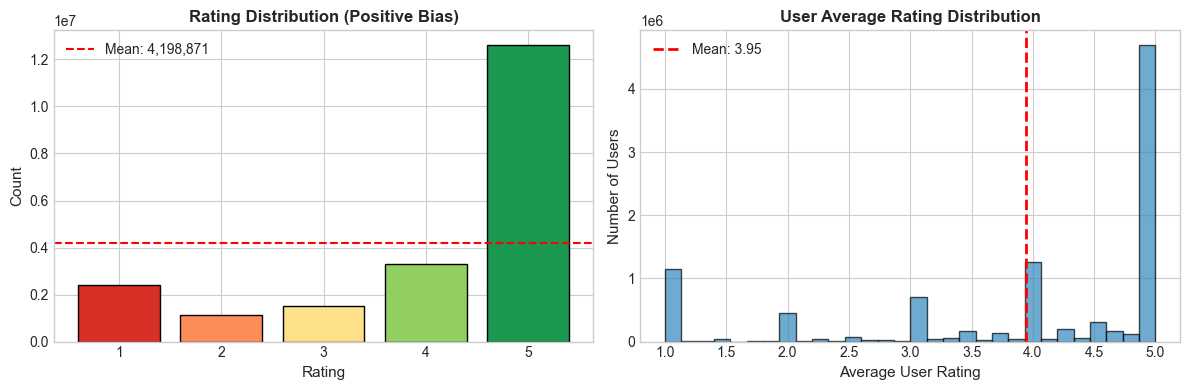

✓ Saved: rating_bias_analysis.png

📊 Interpretation:
   The dataset shows a POSITIVE RATING BIAS with mean=4.07.
   Higher ratings (4-5) are much more common than lower ratings (1-2).
   This is typical in product ratings where users tend to rate items
   they purchased and enjoyed.


In [25]:
# Rating bias analysis
print("\n" + "=" * 70)
print("2. RATING BIAS ANALYSIS")
print("=" * 70)

# Global statistics
global_mean = ratings['rating'].mean()
global_median = ratings['rating'].median()
global_std = ratings['rating'].std()

print(f"\nGlobal Rating Statistics:")
print(f"  Mean rating: {global_mean:.2f}")
print(f"  Median rating: {global_median:.2f}")
print(f"  Std deviation: {global_std:.2f}")

# Rating distribution
rating_dist = ratings['rating'].value_counts().sort_index()
print(f"\nRating Distribution:")
for rating, count in rating_dist.items():
    pct = count / n_ratings * 100
    print(f"  Rating {rating}: {count:,} ({pct:.2f}%)")

# Visualize rating bias
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Rating distribution
colors_rating = ['#d73027', '#fc8d59', '#fee08b', '#91cf60', '#1a9850']
axes[0].bar(rating_dist.index, rating_dist.values, color=colors_rating, edgecolor='black')
axes[0].set_xlabel('Rating', fontsize=11)
axes[0].set_ylabel('Count', fontsize=11)
axes[0].set_title('Rating Distribution (Positive Bias)', fontsize=12, fontweight='bold')
axes[0].axhline(y=rating_dist.mean(), color='red', linestyle='--', label=f'Mean: {rating_dist.mean():,.0f}')
axes[0].legend()

# User average rating distribution
axes[1].hist(r_u['ru'], bins=30, edgecolor='black', alpha=0.7, color='#3288bd')
axes[1].axvline(x=r_u['ru'].mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {r_u["ru"].mean():.2f}')
axes[1].set_xlabel('Average User Rating', fontsize=11)
axes[1].set_ylabel('Number of Users', fontsize=11)
axes[1].set_title('User Average Rating Distribution', fontsize=12, fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_PATH, 'rating_bias_analysis.png'), dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: rating_bias_analysis.png")

print("\n📊 Interpretation:")
print(f"   The dataset shows a POSITIVE RATING BIAS with mean={global_mean:.2f}.")
print(f"   Higher ratings (4-5) are much more common than lower ratings (1-2).")
print("   This is typical in product ratings where users tend to rate items")
print("   they purchased and enjoyed.")



3. LONG-TAIL PROBLEM ANALYSIS

Long-Tail Statistics:
  Top 10% of items account for: 81.76% of all ratings
  Top 20% of items account for: 90.39% of all ratings
  Bottom 50% of items account for: 2.55% of all ratings


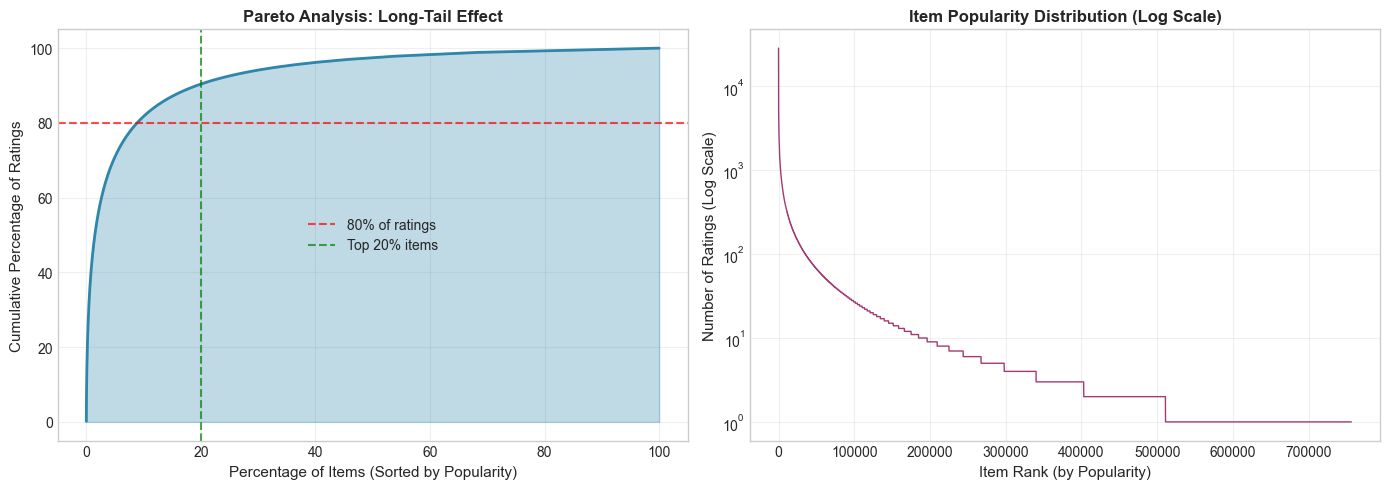

✓ Saved: long_tail_analysis.png

📊 Interpretation:
   The dataset exhibits a clear LONG-TAIL distribution.
   A small number of popular items receive the majority of ratings,
   while many items have very few ratings (the 'long tail').


In [26]:
# Long-tail analysis
print("\n" + "=" * 70)
print("3. LONG-TAIL PROBLEM ANALYSIS")
print("=" * 70)

# Sort items by popularity (number of ratings)
items_sorted = n_i.sort_values('ni', ascending=False).reset_index(drop=True)
items_sorted['cumulative_ratings'] = items_sorted['ni'].cumsum()
items_sorted['cumulative_pct'] = items_sorted['cumulative_ratings'] / n_ratings * 100
items_sorted['item_pct'] = (items_sorted.index + 1) / len(items_sorted) * 100

# Find key statistics
top_10_pct = items_sorted[items_sorted['item_pct'] <= 10]['cumulative_pct'].max()
top_20_pct = items_sorted[items_sorted['item_pct'] <= 20]['cumulative_pct'].max()
bottom_50_pct = 100 - items_sorted[items_sorted['item_pct'] <= 50]['cumulative_pct'].max()

print(f"\nLong-Tail Statistics:")
print(f"  Top 10% of items account for: {top_10_pct:.2f}% of all ratings")
print(f"  Top 20% of items account for: {top_20_pct:.2f}% of all ratings")
print(f"  Bottom 50% of items account for: {bottom_50_pct:.2f}% of all ratings")

# Visualize long-tail
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pareto chart
axes[0].plot(items_sorted['item_pct'], items_sorted['cumulative_pct'], 
             linewidth=2, color='#2E86AB')
axes[0].axhline(y=80, color='red', linestyle='--', alpha=0.7, label='80% of ratings')
axes[0].axvline(x=20, color='green', linestyle='--', alpha=0.7, label='Top 20% items')
axes[0].fill_between(items_sorted['item_pct'], items_sorted['cumulative_pct'], 
                     alpha=0.3, color='#2E86AB')
axes[0].set_xlabel('Percentage of Items (Sorted by Popularity)', fontsize=11)
axes[0].set_ylabel('Cumulative Percentage of Ratings', fontsize=11)
axes[0].set_title('Pareto Analysis: Long-Tail Effect', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Log-scale popularity distribution
axes[1].semilogy(range(1, len(items_sorted) + 1), items_sorted['ni'], 
                 linewidth=1, color='#A23B72')
axes[1].set_xlabel('Item Rank (by Popularity)', fontsize=11)
axes[1].set_ylabel('Number of Ratings (Log Scale)', fontsize=11)
axes[1].set_title('Item Popularity Distribution (Log Scale)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_PATH, 'long_tail_analysis.png'), dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: long_tail_analysis.png")

print("\n📊 Interpretation:")
print(f"   The dataset exhibits a clear LONG-TAIL distribution.")
print(f"   A small number of popular items receive the majority of ratings,")
print(f"   while many items have very few ratings (the 'long tail').")


In [27]:
# Compare results from points 13 & 14
print("\n" + "=" * 70)
print("4. COMPARISON OF CO-RATING ANALYSIS (Points 13 & 14)")
print("=" * 70)

print("\n--- Co-rating Analysis (Point 13) ---")
print(f"Target Users:")
print(f"  U1 (few ratings): {U1_corating_count:,} co-rating users")
if U2_id:
    print(f"  U2 (medium ratings): {U2_corating_count:,} co-rating users")
if U3_id:
    print(f"  U3 (more ratings): {U3_corating_count:,} co-rating users")

print(f"\nTarget Items:")
print(f"  I1 (lowest rated): {I1_corated_count:,} co-rated items")
print(f"  I2 (2nd lowest rated): {I2_corated_count:,} co-rated items")

print("\n--- Threshold β Analysis (Point 14) ---")
print("Users with ≥ 30% item overlap:")
for target, data in beta_results.items():
    print(f"  {target}: β = {data['beta']:,} users")

print("\n📊 Key Insights:")
print("")
print("  1. SPARSITY IMPACT: The high sparsity ({:.2f}%) means most user-item".format(sparsity))
print("     pairs have no ratings, making it difficult to find similar users/items.")
print("")
print("  2. CO-RATING PATTERNS: Users with more ratings have more co-rating")
print("     neighbors, but the β threshold shows that finding users with")
print("     significant overlap (≥30%) is challenging due to sparsity.")
print("")
print("  3. COLD-START PROBLEM: The lowest-rated items (I1, I2) have limited")
print("     co-rated items, making it harder to compute similarities.")
print("")
print("  4. RECOMMENDATION IMPLICATIONS:")
print("     - Use item-based CF for users with few ratings (cold-start)")
print("     - Consider hybrid approaches to handle sparsity")
print("     - Account for positive rating bias in predictions")



4. COMPARISON OF CO-RATING ANALYSIS (Points 13 & 14)

--- Co-rating Analysis (Point 13) ---
Target Users:
  U1 (few ratings): 1,368 co-rating users

Target Items:
  I1 (lowest rated): 5 co-rated items
  I2 (2nd lowest rated): 17 co-rated items

--- Threshold β Analysis (Point 14) ---
Users with ≥ 30% item overlap:
  U1: β = 9,838,675 users

📊 Key Insights:

  1. SPARSITY IMPACT: The high sparsity (100.00%) means most user-item
     pairs have no ratings, making it difficult to find similar users/items.

  2. CO-RATING PATTERNS: Users with more ratings have more co-rating
     neighbors, but the β threshold shows that finding users with
     significant overlap (≥30%) is challenging due to sparsity.

  3. COLD-START PROBLEM: The lowest-rated items (I1, I2) have limited
     co-rated items, making it harder to compute similarities.

  4. RECOMMENDATION IMPLICATIONS:
     - Use item-based CF for users with few ratings (cold-start)
     - Consider hybrid approaches to handle sparsity
    

In [29]:
print("\n" + "=" * 70)
print("STATISTICAL ANALYSIS COMPLETE - ELECTRONICS DATASET")
print("=" * 70)
print(f"\nDataset Summary:")
print(f"  - Users: {n_users:,}")
print(f"  - Items: {n_items:,}")
print(f"  - Ratings: {n_ratings:,}")
print(f"  - Mean Rating: {global_mean:.2f}")
print(f"\nAll results saved in: {RESULTS_PATH}")
print("=" * 70)



STATISTICAL ANALYSIS COMPLETE - ELECTRONICS DATASET

Dataset Summary:
  - Users: 9,838,676
  - Items: 756,489
  - Ratings: 20,994,353
  - Mean Rating: 4.07

All results saved in: ../results
